In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA(n_components=2)
X1 = np.loadtxt("NLS_Group05/Class1.txt")    
X2 = np.loadtxt("NLS_Group05/Class2.txt")

In [2]:
X = np.array([X1,X2])
d = X1[0].shape[0]

In [4]:
mean_vectors = []
for i in range(0,2):
    mean_vectors.append(np.mean(X[i], axis=0))

In [5]:
S_W = np.zeros((d,d))
for cl,mv in zip(range(0,2), mean_vectors):
    class_sc_mat = np.cov(X[i].T) * len(X[i])
    S_W += class_sc_mat   


In [8]:
s1 = np.sum(X1,axis = 0)
s2 = np.sum(X2,axis = 0)
overall_mean = (s1+s1)/(len(X1)+len(X2))
S_B = np.zeros((d,d))
for i,mean_vec in enumerate(mean_vectors):  
    n = len(X[i])
    mean_vec = mean_vec.reshape(d,1) # make column vector
    overall_mean = overall_mean.reshape(d,1) # make column vector
#     print (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print S_B.shape

(2, 2)


In [9]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [10]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

0.10674099544760698
1.3877787807814457e-17


In [17]:
W = np.hstack((eig_pairs[0][1].reshape(d,1)))

In [18]:
files = ["Class1.txt","Class2.txt"]
for file in files:
    data = np.loadtxt("NLS_Group05/"+file)
    p = data.dot(W.real)
    np.savetxt("NLS_Group05/FDA/"+file, p)

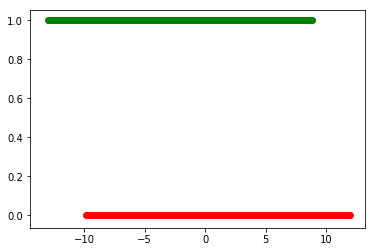

In [20]:
newX = np.loadtxt("NLS_Group05/FDA/Class1.txt")   
x = []
y = []
for i in newX:
    x.append(i)
    y.append(0)
plt.scatter(x,y,color="r")
newX = np.loadtxt("NLS_Group05/FDA/Class2.txt")   
x = []
y = []
for i in newX:
    x.append(i)
    y.append(1)
plt.scatter(x,y,color="g")